Mini Project 1
Don Enrico Esteve | P9550217B | EMJM NeuroData '24-'26

# Part 1 – NumPy, Matplotlib/Seaborn: 
# Q1 (35pts): Convert covariance matrix into correlation matrix using numpy

TODO A. Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and describe their relationship. You may use equations for clarification.

Equation 1. Correlation(x,y) = Covariance(x,y) / sqrt(var(x))*sqrt(var(y)) where Covariance(x,y) = (sigma(x-x_bar)(y-y_bar))/n-1

Both covariance and correlation describe the relationship between two features (or variables); however, covariance is scale-sensitive that only measures its direction or trend (i.e., positive, negative, or no relationship) while correlation is scale-insensitive that measures its strength from -1 to +1. Based on Eq. 1 above, covariance (which ranges up to infinity) is merely a computational stepping stone for correlation; hence, inferences about the data must be based on correlation with adequate sampling size and p-value for confidence.

NOTE: For Part 1, for all relevant cells, I implement an if-else statement that drops the species column. I did not opt to remove it before all other cells so that each cell is self-contained, and the entire code can be backtracked without issues.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [15]:
# TODO B. Load the Iris dataset, using any method of your choice (seaborn)
df_iris = sns.load_dataset("iris")

# Inspect column names and first 10 rows 
df_iris.head(10)

# Descriptive statistics
df_iris.describe()

# Check for missing value and data type
df_iris.info()

# Since no missing values, we will proceed to data exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


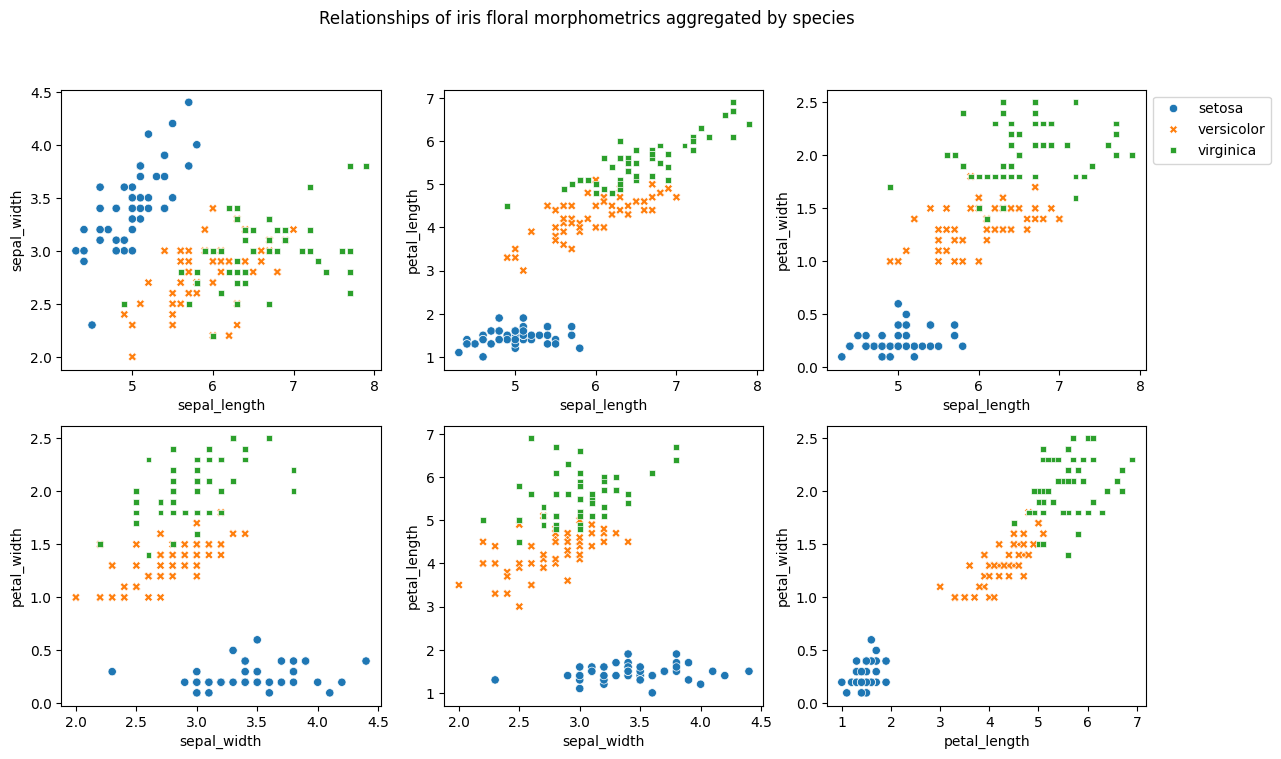

In [16]:
# TODO B: Use visualization to explore the relationship between the different features.
# Define a function for making scatter plots with varying inputs.
def relationship(data):
    """
    This function creates a 2x3 scatter plot showing the relationships between two continuous features.

    Parameters:
    data (dataframe): The pandas dataframe containing all features and observations 
    """
    
    # Define a 2x3 subplot to accommodate the 4C2 = 6 scatter plots
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))
    fig.suptitle("Relationships of iris floral morphometrics aggregated by species")

    # Create scatter plots (x vs. y), keeping "species" for grouping
    fig1 = sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue=data.columns[4], style=data.columns[4], ax=axs[0, 0]) # sepal length vs. sepal width
    fig2 = sns.scatterplot(data=data, x=data.columns[0], y=data.columns[2], hue=data.columns[4], style=data.columns[4], ax=axs[0, 1]) # sepal length vs. petal length
    fig3 = sns.scatterplot(data=data, x=data.columns[0], y=data.columns[3], hue=data.columns[4], style=data.columns[4], ax=axs[0, 2]) # sepal length vs. petal width
    fig4 = sns.scatterplot(data=data, x=data.columns[1], y=data.columns[2], hue=data.columns[4], style=data.columns[4], ax=axs[1, 1]) # sepal width vs. petal length
    fig5 = sns.scatterplot(data=data, x=data.columns[1], y=data.columns[3], hue=data.columns[4], style=data.columns[4], ax=axs[1, 0]) # sepal width vs. petal width
    fig6 = sns.scatterplot(data=data, x=data.columns[2], y=data.columns[3], hue=data.columns[4], style=data.columns[4], ax=axs[1, 2]) # petal length vs. petal width

    # Set a single legend for the entire figure for brevity
    [f.get_legend().remove() for f in [fig1, fig2, fig3, fig4, fig5, fig6]]
    fig3.legend(loc="upper left", bbox_to_anchor=(1, 1))

relationship(data=df_iris)

In [ ]:
# TODO C. Implement the following functions: 
# a. A function to calculate the covariance between two variables/features:
def calcCov(x, y):
    """
    This function calculates the population covariance between two continuous features.

    Parameters:
    x (pandas series): The first feature
    y (pandas series): The second feature

    Returns: a covariance value of type np.float64
    """

    # Drop the species column for later computation
    if 'species' in df_iris:
        df_cont = df_iris.drop(labels='species', axis=1)
    else:
        df_cont = df_iris

    # Initialize a dictionary of means (mu) for each column with a continuous value
    mu_dict = {}

    # Take the mean of each column in the dataframe and store it in the dictionary
    for feature in df_cont.columns:
        mu = np.mean(df_cont[f"{feature}"])
        mu_dict[feature] = mu

    # Convert pd.series to np.array and calculate the differences between each sample of x and y with its respective means
    xval = np.array([i - mu_dict[x.name] for i in x])
    yval = np.array([i - mu_dict[y.name] for i in y])

    # Calculate the covariance. Note that N = len(df_cont) is the number of samples
    cov = sum(xval*yval) / len(df_cont)

    return cov

In [ ]:
# TODO C. Implement the following functions: 
# b. A function to compute the Covariance matrix
def covMat(data):
    """
    This function computes the covariance matrix between each continuous feature in the dataframe.

    Parameters:
    data (dataframe): The pandas dataframe containing all features and observations 

    Returns: a square (4x4) covariance matrix of type pd.dataframe
    """

    # Drop the species column for later computation if present
    if 'species' in data:
        data_cont = data.drop(labels='species', axis=1)
    else:
        data_cont = data

    # Initialize an empty dataframe
    cov_matrix = pd.DataFrame(index=data_cont.columns, columns=data_cont.columns, dtype=float)

    # Create a loop that gets unique combinations from an iterable
    for feat1, feat2 in itertools.combinations_with_replacement(data_cont.columns, 2):

        # Calculate the covariance for each combination
        cov = calcCov(x=data_cont[feat1], y=data_cont[feat2])

        # Print results in a readable format. Limit the results up to three decimal places.
        print(f"The covariance value between {feat1} and {feat2} is {cov:.3f}")

        # Store covariance values in a matrix (symmetric)
        cov_matrix.loc[feat1, feat2] = cov
        cov_matrix.loc[feat2, feat1] = cov  

    # Return the filled covariance matrix
    return cov_matrix

my_covMat = covMat(data=df_iris)

The covariance value between sepal_length and sepal_length is 0.681
The covariance value between sepal_length and sepal_width is -0.042
The covariance value between sepal_length and petal_length is 1.266
The covariance value between sepal_length and petal_width is 0.513
The covariance value between sepal_width and sepal_width is 0.189
The covariance value between sepal_width and petal_length is -0.327
The covariance value between sepal_width and petal_width is -0.121
The covariance value between petal_length and petal_length is 3.096
The covariance value between petal_length and petal_width is 1.287
The covariance value between petal_width and petal_width is 0.577


In [ ]:
# TODO D. Test1: compare the results of your function with NumPy's np.cov(data,rowvar=False) using the iris dataset.
if 'species' in df_iris:
    data_cont = df_iris.drop(labels='species', axis=1)
else:
    data_cont = df_iris

# Calculate population covariance (denominator is N) which is the default option based on NumPy
test1 = np.cov(m=data_cont, rowvar=False)
test1

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [ ]:
# TODO E. Using your covariance function, implement a function to calculate the correlation matrix:
def corrMat(data):
    """
    A function that calculates the correlation between each feature in the dataframe.
    Calculation is based on population covariance.

    Parameters:
    data (dataframe): The pandas dataframe containing all features and observations 

    Returns: a square (4x4) correlation matrix of type pd.dataframe
    """

    # Drop the species column for later computation if present
    if 'species' in data:
        data_cont = data.drop(labels='species', axis=1)
    else:
        data_cont = data

    # Initialize an empty dataframe
    corr_matrix = pd.DataFrame(index=data_cont.columns, columns=data_cont.columns, dtype=float)

    # Create a loop that gets unique combinations from an iterable
    for feat1, feat2 in itertools.combinations_with_replacement(data_cont.columns, 2):

        # Calculate the covariance (numerator) for each combination
        numerator = calcCov(x=data_cont[feat1], y=data_cont[feat2])

        # Calculate the product of standard deviations of x and y (denominator)
        denominator = np.std(data_cont[feat1])*np.std(data_cont[feat2])

        # Calculate the correlation between x and y
        corr = numerator / denominator

        # Print results in a readable format. Limit the results up to three decimal places
        print(f"The correlation value between {feat1} and {feat2} is {corr:.3f}")

        # Store covariance values in a matrix (symmetric)
        corr_matrix.loc[feat1, feat2] = corr
        corr_matrix.loc[feat2, feat1] = corr  
    
    # Return filled correlation matrix
    return corr_matrix

my_corrMat = corrMat(data=df_iris)

The correlation value between sepal_length and sepal_length is 1.000
The correlation value between sepal_length and sepal_width is -0.118
The correlation value between sepal_length and petal_length is 0.872
The correlation value between sepal_length and petal_width is 0.818
The correlation value between sepal_width and sepal_width is 1.000
The correlation value between sepal_width and petal_length is -0.428
The correlation value between sepal_width and petal_width is -0.366
The correlation value between petal_length and petal_length is 1.000
The correlation value between petal_length and petal_width is 0.963
The correlation value between petal_width and petal_width is 1.000


In [ ]:
# TODO F. Test2: validate your correlation matrix implementation by comparing it with the results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.
if 'species' in df_iris:
    data_cont = df_iris.drop(labels='species', axis=1)
else:
    data_cont = df_iris

# Calculate correlation based on NumPy
test2 = np.corrcoef(x=data_cont, rowvar=False)
test2

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [ ]:
# Define a function to make heatmaps for my function results and NumPy results
def heatplot(mat, measure):
    """
    This function creates a heatmap based on seaborn

    Parameters:
    mat (dataframe): The pandas dataframe containing measures of relationship (covariance/correlation) between two continuous features.
    measure (str): The measure of relationship (for title purposes)

    Returns: a square (4x4) heatmap
    """

    # Make a heatmap with values inside and a blue-red color gradient for better visualization
    res = sns.heatmap(mat, annot=True, cmap="coolwarm")
    
    # Set the title of heatmap
    res.set_title(f"{measure} matrix of iris floral morphometry")
    plt.show()

    return res

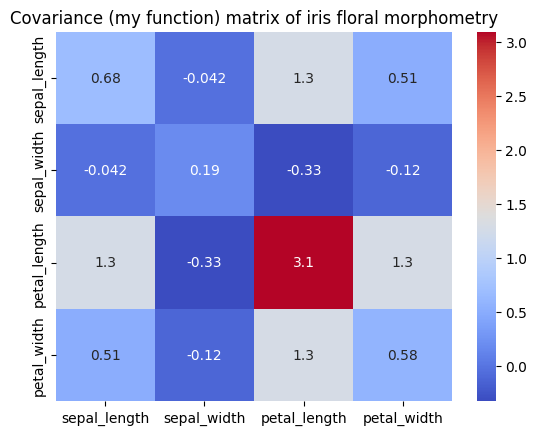

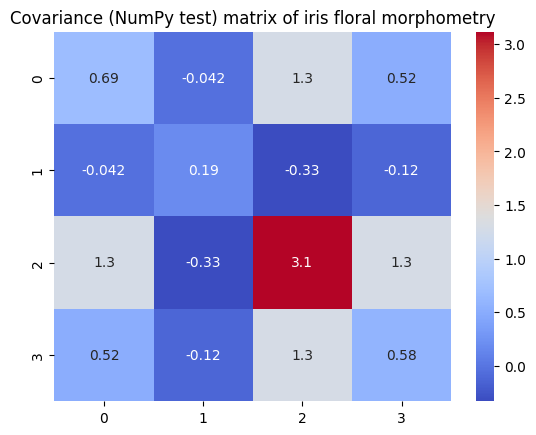

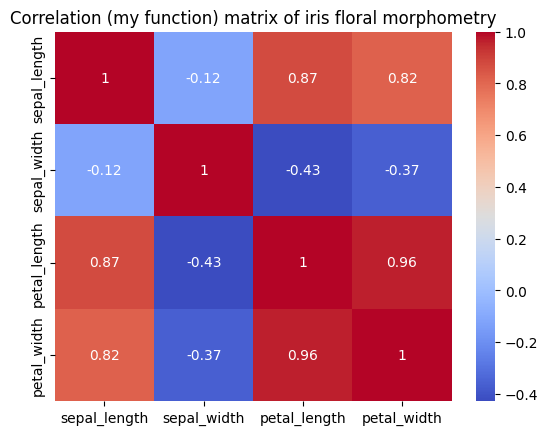

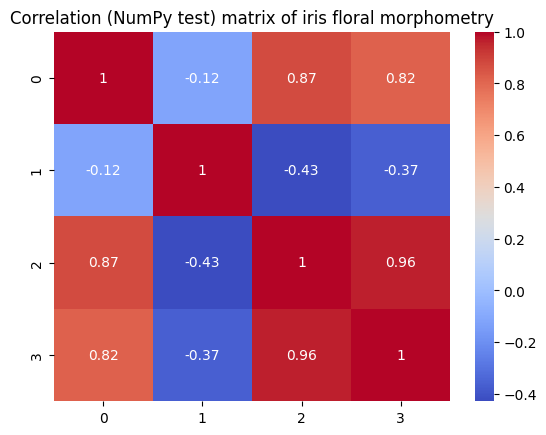

[<Axes: title={'center': 'Covariance (my function) matrix of iris floral morphometry'}>,
 <Axes: title={'center': 'Covariance (NumPy test) matrix of iris floral morphometry'}>,
 <Axes: title={'center': 'Correlation (my function) matrix of iris floral morphometry'}>,
 <Axes: title={'center': 'Correlation (NumPy test) matrix of iris floral morphometry'}>]

In [42]:
# TODO G. Use visualizations to communicate the tests results. Include appropriate titles, axis labels, and colorbars where relevant.

# List all results and titles
res_list = [my_covMat, test1, my_corrMat, test2]
title_list = ["Covariance (my function)", "Covariance (NumPy test)", "Correlation (my function)", "Correlation (NumPy test)"]

# Plot using the defined function in a list comprehension 
[heatplot(res, title) for (res, title) in zip(res_list, title_list)]

# Answers

My functions for computing the covariance and correlation matrices yield the same results from those of NumPy!

Based on the covariance matrices, among the pairs of different features, there is a negative relationship between: sepal length and sepal width; petal length and sepal width; petal width and sepal width. All other combinations have a positive relationship.

Based on the correlation matrices, the pairs of different features with a positive relationship, all have a strong relationship (≥+0.8). This occurs between petal length and sepal length; petal width and sepal length; petal width and petal length, which had the strongest relationship between two different features. The pairs of features with a negative relationship, as identified above, are weak in strength. As expected, all diagonal values yield a correlation value of +1.0.

# Part 2 – NumPy, Pandas, MatPlotLib/Seaborn/Plotly:
# Q2 (50pts): For this question you will use the dataset titled “laptop-price – dataset.csv”.

The purpose of this part is to practice using libraries that were introduced in lecture. These libraries include pandas, numpy and matplotlib/seaborn.
Please use the git commands that you were taught while completing this project and upload this project to your github account.
When submitting the assignment, please include the code file as well as the URL to your git account to show us you understand navigating projects using git.

In [24]:
# Import the libraries mentioned above and import the dataset from your filesystem into the code.
# All plots must be plotted with axes titles and units as well as plot titles.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
# Define the path of the directory containing the dataset
path = "/Users/personalfiles/Desktop/Desktop/NeuroData/Data_Science_and_ASC_Lecture" # Please change this variable when you are to check this work

# Load the dataset
df_laptop = pd.read_csv(f"{path}/laptop_price - dataset.csv", encoding="ISO-8859-1") # Define the encoding to Latin-1 = ISO-8859-1

# Inspect column names and first 5 rows 
df_laptop.head()

# Descriptive statistics
df_laptop.describe()

# Check for missing value and data type
df_laptop.info()

# Since no missing data, we will proceed to data exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [26]:
# TODO: Plot the price of all the laptops
# Define features for brevity
laptop_idx = df_laptop.index
laptop_price = df_laptop["Price (Euro)"]

# Identify the most expensive laptop based on ID
print(f"The most expensive laptop is laptop ID {laptop_idx[laptop_price.idxmax()]} which costs {laptop_price.max()} Euros.")

# Setting the x-axis as the unique laptop ID and plotting without third feature for marker hue or style
price_per_id_plot = px.scatter(x=laptop_idx, y=laptop_price, title="Scatter plot of all laptop prices")
price_per_id_plot.update_layout(xaxis_title="Laptop ID", yaxis_title=laptop_price.name, title_x=0.5)

The most expensive laptop is laptop ID 196 which costs 6099.0 Euros.


In [27]:
# TODO: Which company has on average the most expensive laptop? What is the average laptop price for each company?

# Group the dataset by company, calculate the mean price for each company, and sort the values from highest to lowest
mean_price_per_company = df_laptop.groupby("Company")['Price (Euro)'].mean().sort_values(ascending=False)

# Identify the most expensive laptop based on ID
print(f"The company that sells the most expensive laptop is {mean_price_per_company.idxmax()}, selling laptops for {mean_price_per_company.max():.2f} Euros on average.")

# Plot the results to determine which company has the most expensive laptop
mean_price_per_company_plot = px.bar(data_frame=mean_price_per_company, title="Mean laptop prices for each company")
mean_price_per_company_plot.update_layout(yaxis_title="Price in Euros", title_x=0.5)

The company that sells the most expensive laptop is Razer, selling laptops for 3346.14 Euros on average.


In [28]:
# TODO: Find the different types of Operating systems present in the data - under the column name "OpSys".
# Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

# Check the original unique values for OpSys to find the different types of OS present in the data
OpSys = df_laptop["OpSys"]
print(f"Originally, there was {OpSys.nunique()} unique categories for {OpSys.name} which are: {', '.join(OpSys.unique())}.")

# By manual inspection, it appears that the unique OS are: macOS, Windows, Linux, Android, Chrome OS, and No OS. Hence, convert to unique categories inplace.
df_laptop.replace(to_replace=["Windows 10", "Windows 10 S", "Windows 7"], value="Windows", inplace=True)
df_laptop.replace(to_replace=["Mac OS X", "macOS"], value="macOS", inplace=True)

# Check the new unique values for OpSyS
OpSys = df_laptop["OpSys"]
print(f"Now, there are {OpSys.nunique()} unique categories for {OpSys.name} which are: {', '.join(OpSys.unique())}.")

Originally, there was 9 unique categories for OpSys which are: macOS, No OS, Windows 10, Mac OS X, Linux, Android, Windows 10 S, Chrome OS, Windows 7.
Now, there are 6 unique categories for OpSys which are: macOS, No OS, Windows, Linux, Android, Chrome OS.


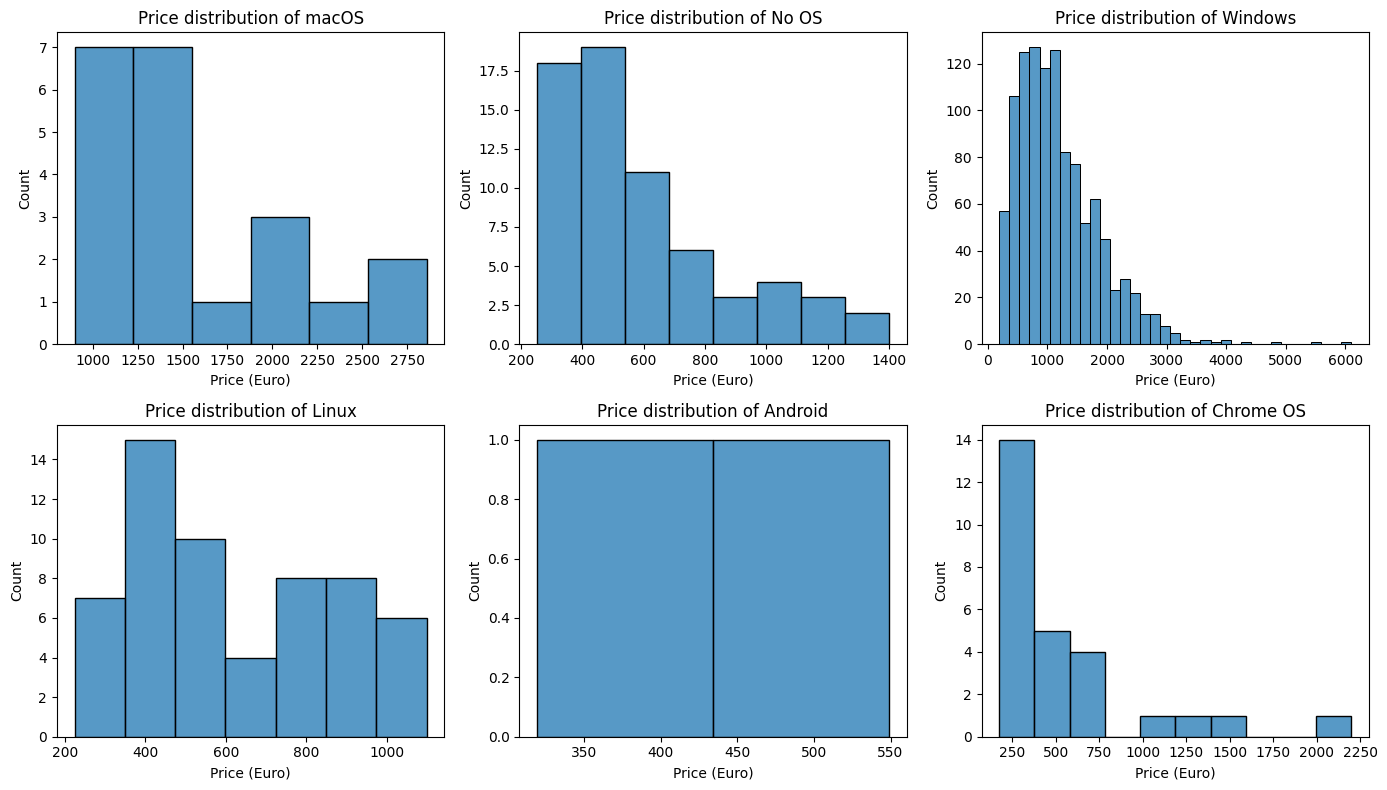

In [29]:
# TODO: Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.
# Set large figure size to accommodate the subplots
plt.figure(figsize=(14, 8))

# Loop over the number (i) and the unique categories (os) of OpSys
for i, os in enumerate(OpSys.unique()):

    # Make a 2-by-3 subplot
    plt.subplot(2, 3, i + 1)

    # Ensure that subplots does not touch each other
    plt.tight_layout()

    # Plot the distribution
    hist = sns.histplot(df_laptop[OpSys==os]["Price (Euro)"])
    hist.set_title(f"Price distribution of {os}")

Laptop price and RAM is strongly positively correlated (0.740).


Text(0.5, 1.0, 'Correlation between Laptop Price and RAM')

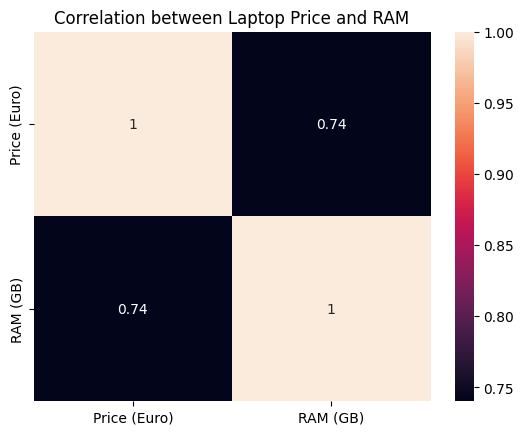

In [30]:
# TODO: What is the relationship between RAM and computer price? add an adequate plot to support your findings.
# Create a dataframe containig RAM and laptop price 
price_RAM = df_laptop.loc[:, ["Price (Euro)", "RAM (GB)"]]

# Calculate the correlation and print the result in an intuitive format
price_RAM_corr = price_RAM.corr()
print(f"Laptop price and RAM is strongly positively correlated ({price_RAM_corr.iat[0, 1]:.3f}).")

# Plot the correlation
sns.heatmap(price_RAM_corr, annot=True).set_title("Correlation between Laptop Price and RAM")

In [31]:
# TODO: Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".
# For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

# Create a series from "Memory"
memory = df_laptop["Memory"]

# Removing the size detail from each observation in the "memory" series. 
# (r"\d+\w+\s*") refers to a raw string literal (r" "), with one or more digits (\d+) and one or more word characters (\w+), and whitespace(\s*)
# (r"\d+|\.") refers to a raw string literal, with one or more digits OR dot
# Overall, we match a sequence of characters with these two regular expressions (regex) and remove them (replace with "") then strip all whitespaces.
df_laptop["Storage type"] = memory.str.replace(r"\d+\w+\s*", "", regex=True).replace(r"\d+|\.", "", regex=True).str.strip()

# Print the unique values for Storage type
storage_type = df_laptop["Storage type"]
print(f"There are {storage_type.nunique()} categories for {storage_type.name}, which are: {', '.join(storage_type.unique())}.")

There are 9 categories for Storage type, which are: SSD, Flash Storage, HDD, SSD +  HDD, SSD +  SSD, Hybrid, Flash Storage +  HDD, HDD +  HDD, SSD +  Hybrid.


# Q3 (15pts): Think of additional questions related to this data. 
What types of analyses and visualizations would you use to address them? Select two questions from your list and implement. Submit your list of questions, suggested analyses and visualizations and the implementation.

List of questions concerning all features:
1. Which company has the greatest number of types of laptop available?

2. Which company has the greatest number of products available?

3. Which laptop type is the most expensive on average?

4. Which CPU company and GPU company has the greatest number of available CPU and GPU type, respectively?

5. How many types of screen resolution (in terms of pixel dimensions) are available, regardless of display?

6. How are laptop weight (kg), size (inches), CPU_Frequency (GHz), and price (Euros) related to each other?

7. Do operating systems ("OpSys") have a preference for specific brands of GPU ("GPU_Company"), CPU ("CPU_Company"), and storage type?

Plans on how to address, analyze, and visualize each question:
1. Group the dataframe by "Company" and count the number of unique categories of "TypeName" for each company. Visualize using a bar plot in descending order.

2. Group the dataframe by "Company" and count the number of unique categories of "Product" for each company. Visualize using a bar plot in descending order.

3. Group the dataframe by "TypeName" and compute the mean of "Price (Euro)" for each type. Visualize using a bar plot in descending order.

4. Group the dataframe by "CPU_Company" and count the number of unique categories of "CPU_Type". Do the same for "GPU_Company" and "GPU_Type". Visualize using two separate bar plot in descending order.

5. Remove all non-numeric characters preceding the pixel dimensions in "ScreenResolution". This results in observation containing the pixel dimensions separated by "x" (for example, 2560x1440). Then, count the number of unique categories of "ScreenResolution". No visualization needed for this.

6. Make a smaller dataframe containing only four columns: "Weight (kg)", "Inches", "CPU_Frequency (GHz)", and "Price (Euro)". Ensure that all columns are of type float64, then calculate the correlation between features using .corr() function in pandas. Visualize using a heatmap with annotations for showing the correlation values.

7. Group the column by "OpSys" then count the number of unique categories of "CPU_Company", "GPU_Company", and "Storage type" each. Visualize using three bar plots, one for each count. 

The first 5 questions are implemented in the following cells.

In [32]:
# Define a function for questions 1-3, since these require the same lines of code.
def which_company_type_answer(df, var1, var2, title, yaxis_title):
    """
    This function addresses questions 1-3 and plots a bar graph for visualization.

    Parameters:
    df (pandas dataframe): A dataframe containing all features and observations.
    var1 (str): Name of column used for grouping the dataframe
    var2 (str): Name of column analyzed (either for getting the mean or number of unique values)
    title (str): The title for the bar graph
    yaxis_title (str): The title for the y-axis

    Returns: A bar graph based on plotly express in descending order.
    """

    # Group the dataframe by var1 and take var2 for analysis. 
    var1_per_var2 = df.groupby(var1)[var2]

    # Analyze the grouped dataframe based on var
    if var1=="TypeName":
        # Analyze the grouped dataframe and sort the values in descending order for plotting
        var1_per_var2 = var1_per_var2.mean().sort_values(ascending=False)

        # Find the maximum value and the index of observation(s) with this maximum value
        max_val = var1_per_var2.max()
        max_vars = var1_per_var2[var1_per_var2 == max_val].index

        # Print results in an intuitive format. Add an if-else statement specific to the column for grouping (var1)
        print(f"The most expensive laptop type is {', '.join(max_vars)}, which costs {max_val:.2f} Euros on average.")

    elif var1=="Company" or var1=="GPU_Company" or var1=="CPU_Company":
        var1_per_var2 = var1_per_var2.nunique().sort_values(ascending=False)
        max_val = var1_per_var2.max()
        max_vars = var1_per_var2[var1_per_var2 == max_val].index
        print(f"The '{var1}' that has the most '{var2}' is/are: {', '.join(max_vars)}, producing {max_val} types.")

    # Print additional statements specific to the column analyzed (var2)
    if var2 == "Product":
        print(f"This is equivalent to {(max_val/df[var2].nunique())*100:.2f}% of all available products.")
    elif var2 == "TypeName":
        print(f"Hence, these companies produce all ({df[var2].nunique()}) available types, which are: {', '.join(df[var2].unique())}.")
        
    # Visualize using a bar plot in descending order
    var1_per_var2_plot = px.bar(var1_per_var2, title=title)
    var1_per_var2_plot.update_layout(yaxis_title=yaxis_title, title_x=0.5)

    return var1_per_var2_plot

In [33]:
# 1. Which company has the greatest number of types of laptop available?
which_company_type_answer(df=df_laptop, var1="Company", var2="TypeName", title="Number of laptop types that each company produces", yaxis_title="Number of laptop types")

The 'Company' that has the most 'TypeName' is/are: Lenovo, HP, Dell, producing 6 types.
Hence, these companies produce all (6) available types, which are: Ultrabook, Notebook, Netbook, Gaming, 2 in 1 Convertible, Workstation.


In [34]:
# 2. Which company has the greatest number of products available?
which_company_type_answer(df=df_laptop, var1="Company", var2="Product", title="Number of products that each company produces", yaxis_title="Number of Products")

The 'Company' that has the most 'Product' is/are: Lenovo, producing 138 types.
This is equivalent to 22.33% of all available products.


In [35]:
# 3. Which laptop type is the most expensive on average?
which_company_type_answer(df=df_laptop, var1="TypeName", var2="Price (Euro)", title="Average Price of each laptop type", yaxis_title="Price in Euros")

The most expensive laptop type is Workstation, which costs 2280.36 Euros on average.


In [36]:
#4a. Which CPU company has the greatest number of available CPU type?
which_company_type_answer(df=df_laptop, var1="CPU_Company", var2="CPU_Type", title="Number of CPU types that each CPU company produces", yaxis_title="Number of CPU types")

The 'CPU_Company' that has the most 'CPU_Type' is/are: Intel, producing 68 types.


In [37]:
#4b. Which GPU company has the greatest number of available GPU type?
which_company_type_answer(df=df_laptop, var1="GPU_Company", var2="GPU_Type", title="Number of GPU types that each GPU company produces", yaxis_title="Number of GPU types")

The 'GPU_Company' that has the most 'GPU_Type' is/are: Nvidia, producing 46 types.
